EECS 498 group 1 winter 2020 <br>
University of Michigan

In [1]:
import pandas as pd
import seaborn as sn
from matplotlib import pyplot as plt
import numpy as np

In [2]:
df = pd.read_excel('light-duty-vehicle-test-results-report-2014-present.xlsx', header=1)

In [3]:
df.describe()

,Model Year,Vehicle Configuration Number,Displacement (L),Curb Weight (lbs.),Gross Vehicle Weight Rating (lbs.),Equivalent Test Weight (lbs.),Number of Gears,Set Coefficient A (lbf),Set Coefficient B (lbf/mph),Set Coefficient C (lbf/mph**2),...,Useful Life Miles (k),Rounded Emission Result (g/mi),Certification Level (g/mi),Emission Standard (g/mi),Additive Deterioration Factor,Multiplicative Deterioration Factor,Ratio of NMOG to NMHC,Upward Diesel Adjustment Factor,Downward Diesel Adjustment Factor,Reactivity Factor (RAF)
count,208859.000000,208859.000000,208859.000000,208859.000000,159926.000000,208859.000000,208859.000000,208859.000000,208859.000000,208859.000000,...,208859.000000,208856.000000,208856.000000,208859.000000,155585.000000,45336.000000,36104.000000,9377.000000,9377.000000,38769.000000
mean,2017.645517,0.511024,3.351740,4662.253300,6255.255037,5106.813544,6.460210,16.542423,0.175403,0.031097,...,113.303214,61.133632,61.211083,237.415672,0.079564,1.024767,0.971961,0.015867,-0.025278,0.934948
std,1.994162,1.126776,2.459996,1695.113744,2239.491438,1989.225263,2.143188,15.425029,0.320516,0.037292,...,51.088266,420.678555,420.742119,403.453624,0.390256,0.131524,0.290410,0.327101,0.183065,0.246621
min,2014.000000,0.000000,0.001000,0.000000,2125.000000,2125.000000,1.000000,-94.900000,-2.962000,-0.005240,...,4.000000,0.000000,-0.010000,0.000000,0.000000,1.000000,0.000000,-0.010000,-2.396800,0.000000
25%,2016.000000,0.000000,2.000000,3610.000000,4760.000000,3875.000000,6.000000,7.850000,0.003700,0.019030,...,120.000000,0.005000,0.010000,0.090000,0.000000,1.000000,1.030000,0.000000,0.000000,1.000000
50%,2018.000000,0.000000,3.000000,4260.000000,5645.000000,4500.000000,6.000000,15.370000,0.140530,0.023390,...,120.000000,0.021700,0.030000,4.200000,0.003400,1.000000,1.040000,0.000000,0.000000,1.000000
75%,2019.000000,1.000000,3.993000,5128.000000,6990.000000,5500.000000,8.000000,24.223000,0.315510,0.030031,...,150.000000,0.283600,0.400000,99.999000,0.020000,1.000000,1.100000,0.001700,0.000000,1.000000
max,2021.000000,10.000000,99.999000,12500.000000,14000.000000,13000.000000,10.000000,207.700000,2.595500,1.000000,...,150.000000,9999.000000,9999.000000,999.999900,9.999900,3.076000,1.540000,8.500000,2.200000,1.000000


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208859 entries, 0 to 208858
Data columns (total 55 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   Model Year                           208859 non-null  int64  
 1   Certificate Manufacturer Name        208859 non-null  object 
 2   Certified Test Group                 208859 non-null  object 
 3   Certified Evaporative Family         201370 non-null  object 
 4   Represented Test Vehicle Make        208859 non-null  object 
 5   Represented Test Vehicle Model       208859 non-null  object 
 6   Vehicle ID                           208859 non-null  object 
 7   Vehicle Configuration Number         208859 non-null  int64  
 8   Displacement (L)                     208859 non-null  float64
 9   Curb Weight (lbs.)                   208859 non-null  int64  
 10  Gross Vehicle Weight Rating (lbs.)   159926 non-null  float64
 11  Equivalent Te

In [38]:
df['Vehicle Class Description'].value_counts()

LDV/Passenger Car                                    123022
LDT2 (LVW 3751-5750, GVW 0-6000)                      24865
LDT3 (ALVW 3751-5750, LVW 0-3750, GVW > 6000)         19359
LDT4 (ALVW > 5750, LVW 0-3750, GVW > 6000)            11773
HDV1 (Federal HD chassis Class 2b GVW 8501-10000)      7640
LDT1 (LVW-3750, GVW 0-6000)                            7239
HDV2 (Federal HD chassis Class 3 GVW 10001-14000)      5254
MDV6 (Cal. LEV 2/3 MDV GVW 8501-10000)                 4818
MDV7 (Cal. LEV 2/3 MDV GVW 10001-14000)                2751
MDPV (Federal Tier 2, GVWR 8501-10000)                 2138
Name: Vehicle Class Description, dtype: int64

In [41]:
df.groupby(['Vehicle ID','Vehicle Class Description']).size()

Vehicle ID         Vehicle Class Description       
000416             LDV/Passenger Car                    10
001HFV5002         LDV/Passenger Car                    12
004002             LDV/Passenger Car                     8
0050N002EA         LDV/Passenger Car                     4
00MBEV4012         LDV/Passenger Car                    12
                                                      ... 
YP5L3U03AC         LDT2 (LVW 3751-5750, GVW 0-6000)    148
YP9L3AU05AC        LDT2 (LVW 3751-5750, GVW 0-6000)    246
Z5023              LDV/Passenger Car                    62
ZAMJK39A690027157  LDV/Passenger Car                   207
one77              LDV/Passenger Car                     8
Length: 2088, dtype: int64

In [46]:
data = df[df['Vehicle ID'] == 'LE67191'][['Model Year','Vehicle ID','Test Number','Test Drive Description','Set Coefficient A (lbf)','Test Originator','Test Procedure Description','Test Fuel Description','Target Coefficient A (lbf)','Rounded Emission Result (g/mi)','Emission Name']]

In [42]:
df[df['Vehicle ID'] == '000416'][['Vehicle ID','Test Number','Test Drive Description','Set Coefficient A (lbf)','Test Originator','Test Procedure Description','Test Fuel Description','Target Coefficient A (lbf)','Rounded Emission Result (g/mi)','Emission Name']]

,Vehicle ID,Test Number,Test Drive Description,Set Coefficient A (lbf),Test Originator,Test Procedure Description,Test Fuel Description,Target Coefficient A (lbf),Rounded Emission Result (g/mi),Emission Name
160993,000416,GJ3X10044504,"2-Wheel Drive, Rear",29.65,MFR,Federal fuel 2-day exhaust (w/can load),Tier 2 Cert Gasoline,51.53,0.590,CO
160994,000416,GJ3X10044504,"2-Wheel Drive, Rear",29.65,MFR,Federal fuel 2-day exhaust (w/can load),Tier 2 Cert Gasoline,51.53,0.004,HCHO
160995,000416,GJ3X10044504,"2-Wheel Drive, Rear",29.65,MFR,Federal fuel 2-day exhaust (w/can load),Tier 2 Cert Gasoline,51.53,0.051,NMOG
160996,000416,GJ3X10044504,"2-Wheel Drive, Rear",29.65,MFR,Federal fuel 2-day exhaust (w/can load),Tier 2 Cert Gasoline,51.53,0.026,NOX
160997,000416,GJ3X10044504,"2-Wheel Drive, Rear",29.65,MFR,Federal fuel 2-day exhaust (w/can load),Tier 2 Cert Gasoline,51.53,0.590,CO
160998,000416,GJ3X10044504,"2-Wheel Drive, Rear",29.65,MFR,Federal fuel 2-day exhaust (w/can load),Tier 2 Cert Gasoline,51.53,0.004,HCHO
160999,000416,GJ3X10044504,"2-Wheel Drive, Rear",29.65,MFR,Federal fuel 2-day exhaust (w/can load),Tier 2 Cert Gasoline,51.53,0.051,NMOG
161000,000416,GJ3X10044504,"2-Wheel Drive, Rear",29.65,MFR,Federal fuel 2-day exhaust (w/can load),Tier 2 Cert Gasoline,51.53,0.026,NOX
161001,000416,GJ3X10044506,"2-Wheel Drive, Rear",29.65,MFR,HWFE,Tier 2 Cert Gasoline,51.53,0.048,NOX
161002,000416,GJ3X10044506,"2-Wheel Drive, Rear",29.65,MFR,HWFE,Tier 2 Cert Gasoline,51.53,0.048,NOX


In [47]:
data

,Model Year,Vehicle ID,Test Number,Test Drive Description,Set Coefficient A (lbf),Test Originator,Test Procedure Description,Test Fuel Description,Target Coefficient A (lbf),Rounded Emission Result (g/mi),Emission Name
0,2021,LE67191,LBMX10058491,All Wheel Drive,14.8,MFR,Federal fuel 3-day exhaust,Tier 3 E10 Regular Gasoline (9 RVP @Low Alt.),61.5,0.1500,CO
1,2021,LE67191,LBMX10058491,All Wheel Drive,14.8,MFR,Federal fuel 3-day exhaust,Tier 3 E10 Regular Gasoline (9 RVP @Low Alt.),61.5,0.0047,NMOG
2,2021,LE67191,LBMX10058491,All Wheel Drive,14.8,MFR,Federal fuel 3-day exhaust,Tier 3 E10 Regular Gasoline (9 RVP @Low Alt.),61.5,0.0157,NMOG+NOX
3,2021,LE67191,LBMX10058491,All Wheel Drive,14.8,MFR,Federal fuel 3-day exhaust,Tier 3 E10 Regular Gasoline (9 RVP @Low Alt.),61.5,0.0110,NOX
4,2021,LE67191,LBMX10058491,All Wheel Drive,14.8,MFR,Federal fuel 3-day exhaust,Tier 3 E10 Regular Gasoline (9 RVP @Low Alt.),61.5,0.0002,PM
...,...,...,...,...,...,...,...,...,...,...,...
9671,2020,LE67191,LBMX91004359,All Wheel Drive,16.7,EPA,Federal fuel 2-day exhaust (w/can load),Tier 2 Cert Gasoline,61.5,0.4600,CO
9672,2020,LE67191,LBMX91004359,All Wheel Drive,16.7,EPA,Federal fuel 2-day exhaust (w/can load),Tier 2 Cert Gasoline,61.5,0.0063,NMOG
9673,2020,LE67191,LBMX91004359,All Wheel Drive,16.7,EPA,Federal fuel 2-day exhaust (w/can load),Tier 2 Cert Gasoline,61.5,0.0108,NMOG+NOX
9674,2020,LE67191,LBMX91004359,All Wheel Drive,16.7,EPA,Federal fuel 2-day exhaust (w/can load),Tier 2 Cert Gasoline,61.5,0.0045,NOX


In [31]:
data['Test Originator'].value_counts()

MFR    169
EPA     65
Name: Test Originator, dtype: int64

In [32]:
data['Set Coefficient A (lbf)'].value_counts()

14.8    154
16.7     65
0.2      15
Name: Set Coefficient A (lbf), dtype: int64

In [48]:
data[data['Set Coefficient A (lbf)']==0.2]

,Model Year,Vehicle ID,Test Number,Test Drive Description,Set Coefficient A (lbf),Test Originator,Test Procedure Description,Test Fuel Description,Target Coefficient A (lbf),Rounded Emission Result (g/mi),Emission Name
38,2021,LE67191,LBMX10058496,All Wheel Drive,0.2,MFR,Cold CO,Cold CO E10 Regular Gasoline (Tier 3),68.4,0.19,CO
39,2021,LE67191,LBMX10058496,All Wheel Drive,0.2,MFR,Cold CO,Cold CO E10 Regular Gasoline (Tier 3),68.4,0.00,HC-NM
40,2021,LE67191,LBMX10058496,All Wheel Drive,0.2,MFR,Cold CO,Cold CO E10 Regular Gasoline (Tier 3),68.4,0.19,CO
92,2021,LE67191,LBMX10058496,All Wheel Drive,0.2,MFR,Cold CO,Cold CO E10 Regular Gasoline (Tier 3),68.4,0.19,CO
93,2021,LE67191,LBMX10058496,All Wheel Drive,0.2,MFR,Cold CO,Cold CO E10 Regular Gasoline (Tier 3),68.4,0.00,HC-NM
94,2021,LE67191,LBMX10058496,All Wheel Drive,0.2,MFR,Cold CO,Cold CO E10 Regular Gasoline (Tier 3),68.4,0.19,CO
9576,2020,LE67191,LBMX10058496,All Wheel Drive,0.2,MFR,Cold CO,Cold CO E10 Regular Gasoline (Tier 3),68.4,0.19,CO
9577,2020,LE67191,LBMX10058496,All Wheel Drive,0.2,MFR,Cold CO,Cold CO E10 Regular Gasoline (Tier 3),68.4,0.00,HC-NM
9578,2020,LE67191,LBMX10058496,All Wheel Drive,0.2,MFR,Cold CO,Cold CO E10 Regular Gasoline (Tier 3),68.4,0.19,CO
9618,2020,LE67191,LBMX10058496,All Wheel Drive,0.2,MFR,Cold CO,Cold CO E10 Regular Gasoline (Tier 3),68.4,0.19,CO


In [33]:
data['Test Number'].value_counts()

LBMX10058491    65
LBMX91004359    65
LBMX10058492    35
LBMX10058494    22
LBMX10058495    20
LBMX10058496    15
LBMX10058493    12
Name: Test Number, dtype: int64

In [34]:
data['Test Procedure Description'].value_counts()

Federal fuel 2-day exhaust (w/can load)    65
Federal fuel 3-day exhaust                 65
HWFE                                       35
US06                                       22
Fed. fuel 50 F exh.                        20
Cold CO                                    15
SC03                                       12
Name: Test Procedure Description, dtype: int64

In [37]:
data['Emission Name'].value_counts()

CO          43
NMOG        43
NOX         43
NMOG+NOX    35
PM          30
CREE        15
N2O         10
METHANE     10
HC-NM        5
Name: Emission Name, dtype: int64

In [10]:
df.dropna(subset=['Rounded Emission Result (g/mi)'],inplace=True)

Since this dataset did not separate electric car from gas car, I decided to split the data into three pieces: <br>
gas, ev, and hybrid car <br>

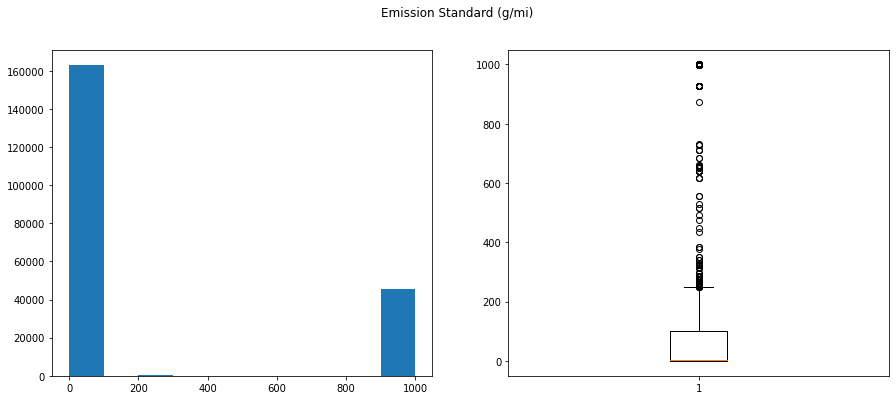

In [26]:
f, axs = plt.subplots(1,2,figsize=(15,6))
axs[0].hist(df['Emission Standard (g/mi)'])
axs[1].boxplot(df['Emission Standard (g/mi)'])
f.suptitle('Emission Standard (g/mi)')
plt.show()

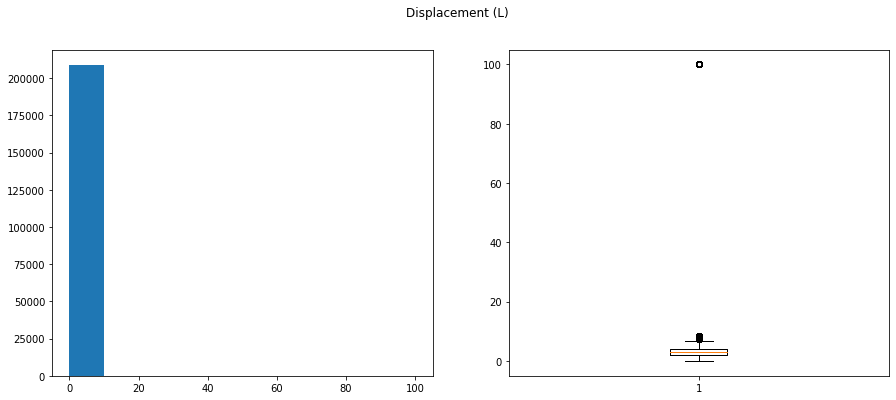

In [27]:
f, axs = plt.subplots(1,2,figsize=(15,6))
axs[0].hist(df['Displacement (L)'])
axs[1].boxplot(df['Displacement (L)'])
f.suptitle('Displacement (L)')
plt.show()

In [34]:
df[df['Emission Standard (g/mi)']==0]['Displacement (L)'].value_counts()

0.001     759
0.100      70
0.010      56
99.999     35
2.500       5
99.990      4
Name: Displacement (L), dtype: int64

we can see that there are 5 observations that with 0 emission standard but a normal displacement, I guess this is data error. I decided to remove it.

In [3]:
df.drop(df[(df['Emission Standard (g/mi)']==0) & (df['Displacement (L)'] == 2.5)].index,inplace=True)

In [39]:
df[df['Emission Standard (g/mi)']>800]['Represented Test Vehicle Model'].value_counts()

F350 4x4                1383
1500 4X4                1277
3500 Cab Chassis 4X4     866
Cherokee 4X4             863
ACCORD                   673
                        ... 
Alpina B7 LWB xDrive       1
CIVIC SI                   1
F-250                      1
SENTRA SL                  1
FCX Clarity                1
Name: Represented Test Vehicle Model, Length: 916, dtype: int64

As we can see from two plots above, there are some extrme values in the Emission Standard (g/mi), I would like to know the reason for that. Since it counts not a small portation of the data, keep it.

In [43]:
df[df['Vehicle ID']=='236237'][['Displacement (L)','Emission Standard (g/mi)']]

,Displacement (L),Emission Standard (g/mi)
957,3.9,2.100
958,3.9,999.999
959,3.9,0.125
960,3.9,999.999
961,3.9,0.003
...,...,...
1190,3.9,0.300
1191,3.9,999.999
1192,3.9,10.100
1193,3.9,0.300


This particular vehicle has some strange data, I decided to remove it

In [4]:
df = df[df['Vehicle ID']!='236237']

In [5]:
# create a new column to indicate hybrid, normal and electric car
def sep(row):
    dis = row['Displacement (L)']
    if dis <= 0.1 or dis > 99:
        return 'ev'
    elif row['Hybrid Yes/No?'] == 'Y':
        return 'hy'
    else:
        return 'gas'
df['car_type'] = df.apply(sep,1)

In [46]:
df.car_type.value_counts()

gas    186361
hy      20966
ev       1289
Name: car_type, dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 208616 entries, 0 to 208858
Data columns (total 56 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   Model Year                           208616 non-null  int64  
 1   Certificate Manufacturer Name        208616 non-null  object 
 2   Certified Test Group                 208616 non-null  object 
 3   Certified Evaporative Family         201127 non-null  object 
 4   Represented Test Vehicle Make        208616 non-null  object 
 5   Represented Test Vehicle Model       208616 non-null  object 
 6   Vehicle ID                           208616 non-null  object 
 7   Vehicle Configuration Number         208616 non-null  int64  
 8   Displacement (L)                     208616 non-null  float64
 9   Curb Weight (lbs.)                   208616 non-null  int64  
 10  Gross Vehicle Weight Rating (lbs.)   159688 non-null  float64
 11  Equivalent Te

Only select numerical variables of interest and keep unique combinations of coefficients

In [85]:
new_df = df[['Model Year','Vehicle ID','Carline Models Covered','Test Procedure Description','car_type','Displacement (L)','Curb Weight (lbs.)','Number of Gears','Set Coefficient A (lbf)',\
             'Set Coefficient B (lbf/mph)','Set Coefficient C (lbf/mph**2)','Target Coefficient A (lbf)',\
             'Target Coefficient B (lbf/mph)','Target Coefficient C (lbf/mph**2)']]\
            .drop_duplicates(subset=['Vehicle ID','Set Coefficient A (lbf)','Set Coefficient B (lbf/mph)','Set Coefficient C (lbf/mph**2)',\
                                     'Target Coefficient A (lbf)','Target Coefficient B (lbf/mph)','Target Coefficient C (lbf/mph**2)'])

In [86]:
num_df = new_df[['Set Coefficient A (lbf)',\
             'Set Coefficient B (lbf/mph)','Set Coefficient C (lbf/mph**2)','Target Coefficient A (lbf)',\
             'Target Coefficient B (lbf/mph)','Target Coefficient C (lbf/mph**2)']]

In [87]:
from sklearn.preprocessing import StandardScaler
num_df = StandardScaler().fit_transform(num_df)

In [88]:
num_df

array([[-0.00683492,  0.12220074, -0.1652767 ,  0.92664187, -0.97086803,
        -0.05447613],
       [-1.00291609,  0.06026709, -0.11319744,  1.33829234, -0.99399311,
         0.02455338],
       [ 0.12279209,  0.06911475, -0.18286792,  0.92664187, -0.97086803,
        -0.07581409],
       ...,
       [ 0.56065845,  0.97216634,  1.781099  ,  1.53576524,  3.11464084,
         2.14070004],
       [-2.57945334,  2.09139586, -0.2136757 , -0.1251549 ,  0.41131834,
        -0.15378987],
       [-2.57945334,  2.09139586, -0.2136757 , -0.1251549 ,  0.41131834,
        -0.15378987]])

In [89]:
num_df = pd.DataFrame(data=num_df, index=new_df.index,columns=['Set Coefficient A (lbf)',\
             'Set Coefficient B (lbf/mph)','Set Coefficient C (lbf/mph**2)','Target Coefficient A (lbf)',\
             'Target Coefficient B (lbf/mph)','Target Coefficient C (lbf/mph**2)'])


In [84]:
new_df.head()

,Model Year,Vehicle ID,Carline Models Covered,Test Procedure Description,car_type,Displacement (L),Curb Weight (lbs.),Number of Gears,Set Coefficient A (lbf),Set Coefficient B (lbf/mph),Set Coefficient C (lbf/mph**2),Target Coefficient A (lbf),Target Coefficient B (lbf/mph),Target Coefficient C (lbf/mph**2)
0,2021,LE67191,"BMW: 228i xDrive Gran Coupe, 230i Convertible,...",Federal fuel 3-day exhaust,gas,2.0,4116,8,14.8,0.172,0.02247,61.5,-0.090,0.02705
38,2021,LE67191,"BMW: 228i xDrive Gran Coupe, 230i Convertible,...",Cold CO,gas,2.0,4116,8,0.2,0.151,0.02472,68.4,-0.100,0.03005
41,2021,LE67191,"BMW: 228i xDrive Gran Coupe, 230i Convertible,...",Federal fuel 2-day exhaust (w/can load),gas,2.0,4116,8,16.7,0.154,0.02171,61.5,-0.090,0.02624
108,2021,LG69397,"BMW: 330e, 330e xDrive, 530e, 530e xDrive, X3 ...",Federal fuel 3-day exhaust,hy,2.0,4586,8,26.3,-0.217,0.02542,70.8,-0.255,0.02775
130,2021,LG69397,"BMW: 330e, 330e xDrive, 530e, 530e xDrive, X3 ...",Cold CO,hy,2.0,4586,8,16.0,-0.342,0.28620,78.6,-0.283,0.03083


In [101]:
num_df['car_type'] = new_df['car_type']
num_df['Displacement (L)'] = new_df['Displacement (L)']
num_df['Curb Weight (lbs.)'] = new_df['Curb Weight (lbs.)']
num_df['Number of Gears'] = new_df['Number of Gears']
num_df

,Set Coefficient A (lbf),Set Coefficient B (lbf/mph),Set Coefficient C (lbf/mph**2),Target Coefficient A (lbf),Target Coefficient B (lbf/mph),Target Coefficient C (lbf/mph**2),car_type,Displacement (L),Curb Weight (lbs.),Number of Gears
0,-0.006835,0.122201,-0.165277,0.926642,-0.970868,-0.054476,gas,2.0,4116,8
38,-1.002916,0.060267,-0.113197,1.338292,-0.993993,0.024553,gas,2.0,4116,8
41,0.122792,0.069115,-0.182868,0.926642,-0.970868,-0.075814,gas,2.0,4116,8
108,0.777750,-1.025046,-0.096995,1.481475,-1.352432,-0.036036,hy,2.0,4586,8
130,0.075035,-1.393699,5.939107,1.946819,-1.417182,0.045101,hy,2.0,4586,8
...,...,...,...,...,...,...,...,...,...,...
208768,-0.154746,1.201085,0.030078,0.051437,1.008177,0.058009,gas,3.7,6000,6
208776,1.384267,-0.029684,0.365469,1.736221,0.810226,1.720263,gas,5.4,6500,4
208783,0.560658,0.972166,1.781099,1.535765,3.114641,2.140700,gas,6.2,10000,6
208834,-2.579453,2.091396,-0.213676,-0.125155,0.411318,-0.153790,gas,3.6,5000,6


In [93]:
gas = num_df[num_df.car_type=='gas']
ev = num_df[num_df.car_type=='ev']
hybrid = num_df[num_df.car_type=='hy']

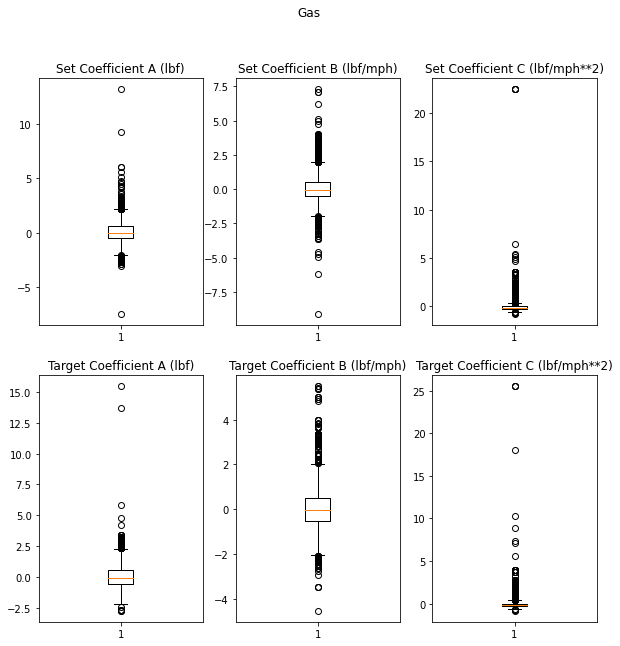

In [94]:
fig,ax=plt.subplots(2,3,figsize=(10,10))
fig.suptitle('Gas')
i = 0
for axs in ax.flatten():  
    axs.boxplot(gas.iloc[:,i])
    axs.set_title(gas.columns[i])
    i+=1

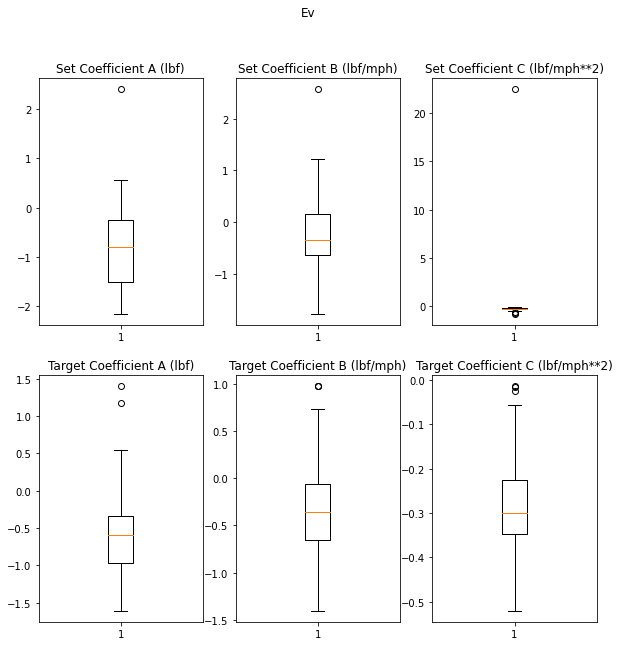

In [95]:
fig,ax=plt.subplots(2,3,figsize=(10,10))
fig.suptitle('Ev')
i = 0
for axs in ax.flatten():  
    axs.boxplot(ev.iloc[:,i])
    axs.set_title(ev.columns[i])
    i+=1

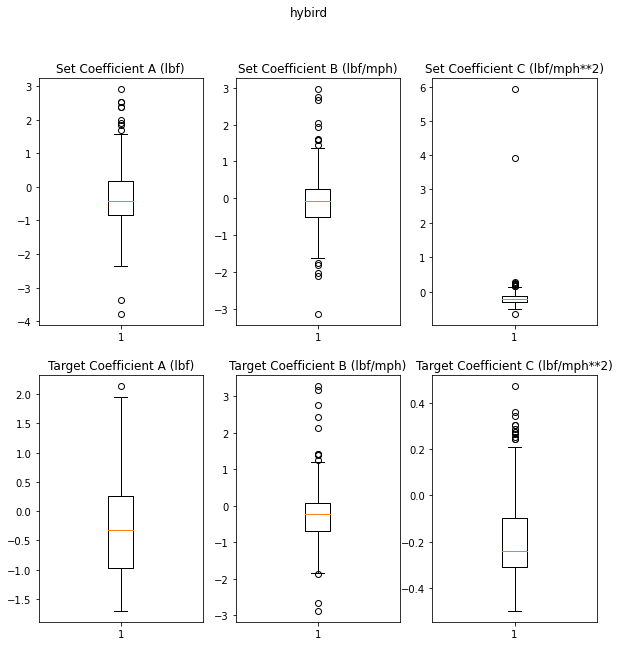

In [96]:
fig,ax=plt.subplots(2,3,figsize=(10,10))
fig.suptitle('hybird')
i = 0
for axs in ax.flatten():  
    axs.boxplot(hybrid.iloc[:,i])
    axs.set_title(hybrid.columns[i])
    i+=1

Obviously, they have different distributions

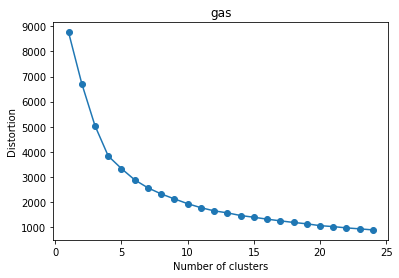

In [105]:
from sklearn.cluster import KMeans
distortions = []
for i in range(1, 25):
    km_set = KMeans(n_clusters=i)
    km_set.fit(gas.iloc[:,0:3].values)
    distortions.append(km_set.inertia_)

# plot
plt.plot(range(1, 25), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.title('gas')
plt.show()

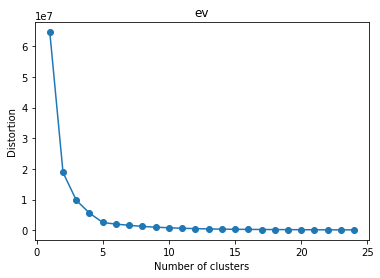

In [71]:
distortions = []
for i in range(1, 25):
    km_set = KMeans(n_clusters=i)
    km_set.fit(ev.drop(ev.columns[0:5],axis=1).values)
    distortions.append(km_set.inertia_)

# plot
plt.plot(range(1, 25), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.title('ev')
plt.show()

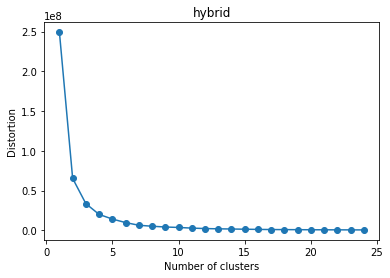

In [72]:
distortions = []
for i in range(1, 25):
    km_set = KMeans(n_clusters=i)
    km_set.fit(hybrid.drop(hybrid.columns[0:5],axis=1).values)
    distortions.append(km_set.inertia_)

# plot
plt.plot(range(1, 25), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.title('hybrid')
plt.show()

we choose k = 5

In [73]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=5).fit(gas.drop(gas.columns[0:5],axis=1).values)
gas_label = km.labels_

km = KMeans(n_clusters=5).fit(ev.drop(ev.columns[0:5],axis=1).values)
ev_label = km.labels_

km = KMeans(n_clusters=5).fit(hybrid.drop(hybrid.columns[0:5],axis=1).values)
hy_label = km.labels_

gas['label'] = gas_label
ev['label'] = ev_label
hybrid['label'] = hy_label

/home/guojp/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/home/guojp/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/home/guojp/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_

In [76]:
gas.reset_index(inplace=True)
gas.set_index(['car_type','Set Coefficient A (lbf)',\
             'Set Coefficient B (lbf/mph)','Set Coefficient C (lbf/mph**2)','Target Coefficient A (lbf)',\
             'Target Coefficient B (lbf/mph)','Target Coefficient C (lbf/mph**2)'],inplace=True)
gas_full = df[df.car_type=='gas']
gas = gas_full.join(gas, on=['car_type','Set Coefficient A (lbf)','Set Coefficient B (lbf/mph)','Set Coefficient C (lbf/mph**2)',\
                       'Target Coefficient A (lbf)',
             'Target Coefficient B (lbf/mph)','Target Coefficient C (lbf/mph**2)'],\
             lsuffix='',rsuffix='_sub')

In [78]:
ev_full = df[df.car_type=='ev']
ev.set_index(['car_type','Set Coefficient A (lbf)',\
             'Set Coefficient B (lbf/mph)','Set Coefficient C (lbf/mph**2)','Target Coefficient A (lbf)',\
             'Target Coefficient B (lbf/mph)','Target Coefficient C (lbf/mph**2)'],inplace=True)
ev_full = ev_full.join(ev, on=['car_type','Set Coefficient A (lbf)','Set Coefficient B (lbf/mph)','Set Coefficient C (lbf/mph**2)',\
                       'Target Coefficient A (lbf)',
             'Target Coefficient B (lbf/mph)','Target Coefficient C (lbf/mph**2)'],\
             lsuffix='',rsuffix='_sub')

In [79]:
hybrid_full = df[df.car_type=='hy']
hybrid.set_index(['car_type','Set Coefficient A (lbf)',\
             'Set Coefficient B (lbf/mph)','Set Coefficient C (lbf/mph**2)','Target Coefficient A (lbf)',\
             'Target Coefficient B (lbf/mph)','Target Coefficient C (lbf/mph**2)'],inplace=True)
hybrid_full = hybrid_full.join(hybrid, on=['car_type','Set Coefficient A (lbf)','Set Coefficient B (lbf/mph)','Set Coefficient C (lbf/mph**2)',\
                       'Target Coefficient A (lbf)',
             'Target Coefficient B (lbf/mph)','Target Coefficient C (lbf/mph**2)'],\
             lsuffix='',rsuffix='_sub')

In [90]:
gas = gas.loc[:,~gas.columns.str.endswith('_sub')]
ev_full = ev_full.loc[:,~ev_full.columns.str.endswith('_sub')]
hybrid_full = hybrid_full.loc[:,~hybrid_full.columns.str.endswith('_sub')]

A demo for implementing Gradient Boosting Regressor in SKlearn

First, I apply regression to the gas data and ingore labels <br>
Rounded Emission Result (g/mi) is Y

In [105]:
gas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 197210 entries, 0 to 208858
Data columns (total 57 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   Model Year                           197210 non-null  int64  
 1   Certificate Manufacturer Name        197210 non-null  object 
 2   Certified Test Group                 197210 non-null  object 
 3   Certified Evaporative Family         191010 non-null  object 
 4   Represented Test Vehicle Make        197210 non-null  object 
 5   Represented Test Vehicle Model       197210 non-null  object 
 6   Vehicle ID                           197210 non-null  object 
 7   Vehicle Configuration Number         197210 non-null  int64  
 8   Displacement (L)                     197210 non-null  float64
 9   Curb Weight (lbs.)                   197210 non-null  int64  
 10  Gross Vehicle Weight Rating (lbs.)   152385 non-null  float64
 11  Equivalent Te

In [130]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
y = gas['Rounded Emission Result (g/mi)']
X = gas[['Model Year','Displacement (L)','Curb Weight (lbs.)','Number of Gears','Useful Life Miles (k)',\
        'Set Coefficient A (lbf)','Set Coefficient B (lbf/mph)','Set Coefficient C (lbf/mph**2)','label']]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
reg = GradientBoostingRegressor(random_state=0)
reg.fit(X_train, y_train)

GradientBoostingRegressor(random_state=0)

In [131]:
reg.score(X_test, y_test)

0.05788616221395526

In [132]:
reg.score(X_train, y_train)

0.06349406859035833

we can see that the performance of this model is very bad (The best possible score is 1.0) <br>
below I will try to leverage the clustering analysis

In [108]:
gas.label.value_counts()

3    78572
1    59562
0    37176
4    14391
2     7509
Name: label, dtype: int64

I will choose group 3 as a demo

In [109]:
y = gas[gas.label==3]['Rounded Emission Result (g/mi)']
X = gas[gas.label==3][['Model Year','Displacement (L)','Curb Weight (lbs.)','Number of Gears','Useful Life Miles (k)',\
        'Set Coefficient A (lbf)','Set Coefficient B (lbf/mph)','Set Coefficient C (lbf/mph**2)']]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
reg = GradientBoostingRegressor(random_state=0)
reg.fit(X_train, y_train)
print('training score',reg.score(X_train, y_train),'testing score',reg.score(X_test, y_test))

training score 0.12005073724342219 testing score 0.09594396912376524


As shown above, it helps. You can try any model by changing the import part: <br>
`from sklearn.ensemble import GradientBoostingRegressor`
<br>
if you want Lasso: <br>
`from sklearn import linear_model
reg = linear_model.LassoLars(alpha=.1)`

Good luck :)

In [118]:
for i in range(5):
    y = gas[gas.label==i]['Rounded Emission Result (g/mi)']
    X = gas[gas.label==i][['Model Year','Displacement (L)','Curb Weight (lbs.)','Number of Gears','Useful Life Miles (k)',\
            'Set Coefficient A (lbf)','Set Coefficient B (lbf/mph)','Set Coefficient C (lbf/mph**2)']]
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
    reg = GradientBoostingRegressor(random_state=0)
    reg.fit(X_train, y_train)
    print('For group',i,'training score',reg.score(X_train, y_train),'testing score',reg.score(X_test, y_test))

For group 0 training score 0.11141576959204369 testing score 0.09840036829386745
For group 1 training score 0.06984984106808367 testing score 0.06372273050040933
For group 2 training score 0.10100811554709299 testing score 0.08529400038464863
For group 3 training score 0.12005073724342219 testing score 0.09594396912376524
For group 4 training score 0.08795048446871545 testing score 0.06906789548795478


In [117]:
for i in range(5):
    y = gas[gas.label==i]['Rounded Emission Result (g/mi)']
    X = gas[gas.label==i][['Displacement (L)','Curb Weight (lbs.)','Number of Gears','Useful Life Miles (k)',\
            'Set Coefficient A (lbf)','Set Coefficient B (lbf/mph)','Set Coefficient C (lbf/mph**2)']]
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
    reg = GradientBoostingRegressor(random_state=0)
    reg.fit(X_train, y_train)
    print('For group',i,'training score',reg.score(X_train, y_train),'testing score',reg.score(X_test, y_test))

For group 0 training score 0.10662019527033473 testing score 0.09404930591260752
For group 1 training score 0.06746553159054047 testing score 0.05966398174330989
For group 2 training score 0.0993348875351161 testing score 0.09357086497071743
For group 3 training score 0.10906019614193818 testing score 0.11157186295465482
For group 4 training score 0.08665990944275825 testing score 0.06802730547681024


In [119]:
from sklearn.neural_network import MLPRegressor
y = gas['Rounded Emission Result (g/mi)']
X = gas[['Model Year','Displacement (L)','Curb Weight (lbs.)','Number of Gears','Useful Life Miles (k)',\
        'Set Coefficient A (lbf)','Set Coefficient B (lbf/mph)','Set Coefficient C (lbf/mph**2)']]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
regr = MLPRegressor(hidden_layer_sizes=(10,10,10,10,10),\
                    random_state=1, max_iter=1000).fit(X_train, y_train)
print('training score',regr.score(X_train, y_train),'testing score',regr.score(X_test, y_test))

training score 0.003323552411446662 testing score 0.0035987360706868365


In [120]:
from sklearn.neural_network import MLPRegressor
y = gas['Rounded Emission Result (g/mi)']
X = gas[['Displacement (L)','Curb Weight (lbs.)','Number of Gears','Useful Life Miles (k)',\
        'Set Coefficient A (lbf)','Set Coefficient B (lbf/mph)','Set Coefficient C (lbf/mph**2)']]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
regr = MLPRegressor(hidden_layer_sizes=(10,10,10,10,10),\
                    random_state=1, max_iter=1000).fit(X_train, y_train)
print('training score',regr.score(X_train, y_train),'testing score',regr.score(X_test, y_test))

training score 0.01716616091745571 testing score 0.015360968191266311


In [129]:
from sklearn import neighbors
knn = neighbors.KNeighborsRegressor(15)
knn.fit(X,y)
print('training score',knn.score(X_train, y_train),'testing score',knn.score(X_test, y_test))

training score 0.12867505714598526 testing score 0.09278180212587828
